# Install dependencies

In [1]:
!pip install -q datasets transformers evaluate wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyar

# Log in first since the dataset is gated

We need to log in since the dataset is gated. Please accept the dataset license in order to use it first.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

# Dataset loading

In [3]:
sidewalk_dataset_identifier = "segments/sidewalk-semantic"

In [4]:
from datasets import load_dataset

dataset = load_dataset(sidewalk_dataset_identifier)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/324M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 1000
    })
})

# Split into train and test sets

In [6]:
dataset = dataset.shuffle(seed=1)
dataset = dataset["train"].train_test_split(test_size=0.2)
train_ds = dataset["train"]
test_ds = dataset["test"]

In [7]:
image = train_ds[0]
image

{'pixel_values': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>,
 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1920x1080>}

## Let's visualize one example  (TODO)



In [8]:
print(image['label'])

<PIL.PngImagePlugin.PngImageFile image mode=L size=1920x1080 at 0x7A568111B9D0>


In [9]:
import json
from huggingface_hub import hf_hub_download

filename = "id2label.json"
id2label = json.load(open(hf_hub_download(repo_id=sidewalk_dataset_identifier, filename=filename, repo_type="dataset"), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}

num_labels = len(id2label)
print("Id2label:", id2label)

id2label.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

Id2label: {0: 'unlabeled', 1: 'flat-road', 2: 'flat-sidewalk', 3: 'flat-crosswalk', 4: 'flat-cyclinglane', 5: 'flat-parkingdriveway', 6: 'flat-railtrack', 7: 'flat-curb', 8: 'human-person', 9: 'human-rider', 10: 'vehicle-car', 11: 'vehicle-truck', 12: 'vehicle-bus', 13: 'vehicle-tramtrain', 14: 'vehicle-motorcycle', 15: 'vehicle-bicycle', 16: 'vehicle-caravan', 17: 'vehicle-cartrailer', 18: 'construction-building', 19: 'construction-door', 20: 'construction-wall', 21: 'construction-fenceguardrail', 22: 'construction-bridge', 23: 'construction-tunnel', 24: 'construction-stairs', 25: 'object-pole', 26: 'object-trafficsign', 27: 'object-trafficlight', 28: 'nature-vegetation', 29: 'nature-terrain', 30: 'sky', 31: 'void-ground', 32: 'void-dynamic', 33: 'void-static', 34: 'void-unclear'}


In [10]:
sidewalk_palette = [
  [0, 0, 0], # unlabeled
  [216, 82, 24], # flat-road
  [255, 255, 0], # flat-sidewalk
  [125, 46, 141], # flat-crosswalk
  [118, 171, 47], # flat-cyclinglane
  [161, 19, 46], # flat-parkingdriveway
  [255, 0, 0], # flat-railtrack
  [0, 128, 128], # flat-curb
  [190, 190, 0], # human-person
  [0, 255, 0], # human-rider
  [0, 0, 255], # vehicle-car
  [170, 0, 255], # vehicle-truck
  [84, 84, 0], # vehicle-bus
  [84, 170, 0], # vehicle-tramtrain
  [84, 255, 0], # vehicle-motorcycle
  [170, 84, 0], # vehicle-bicycle
  [170, 170, 0], # vehicle-caravan
  [170, 255, 0], # vehicle-cartrailer
  [255, 84, 0], # construction-building
  [255, 170, 0], # construction-door
  [255, 255, 0], # construction-wall
  [33, 138, 200], # construction-fenceguardrail
  [0, 170, 127], # construction-bridge
  [0, 255, 127], # construction-tunnel
  [84, 0, 127], # construction-stairs
  [84, 84, 127], # object-pole
  [84, 170, 127], # object-trafficsign
  [84, 255, 127], # object-trafficlight
  [170, 0, 127], # nature-vegetation
  [170, 84, 127], # nature-terrain
  [170, 170, 127], # sky
  [170, 255, 127], # void-ground
  [255, 0, 127], # void-dynamic
  [255, 84, 127], # void-static
  [255, 170, 127], # void-unclear
]

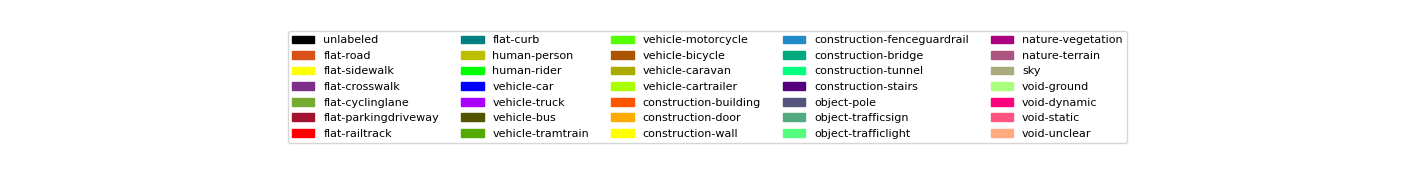

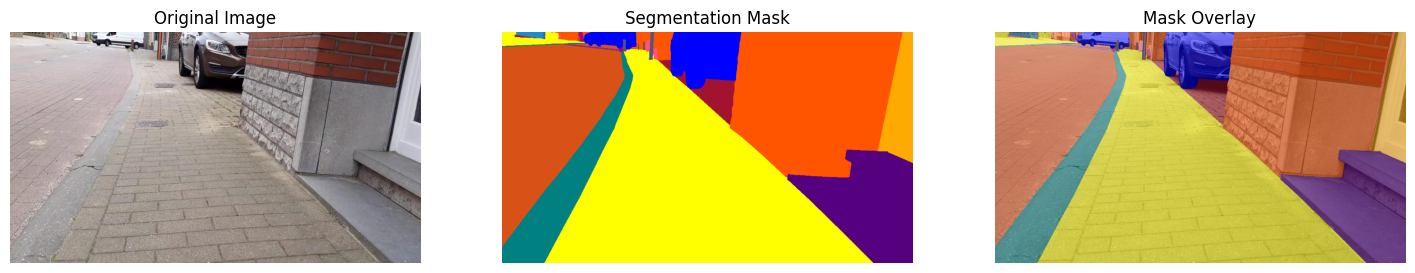

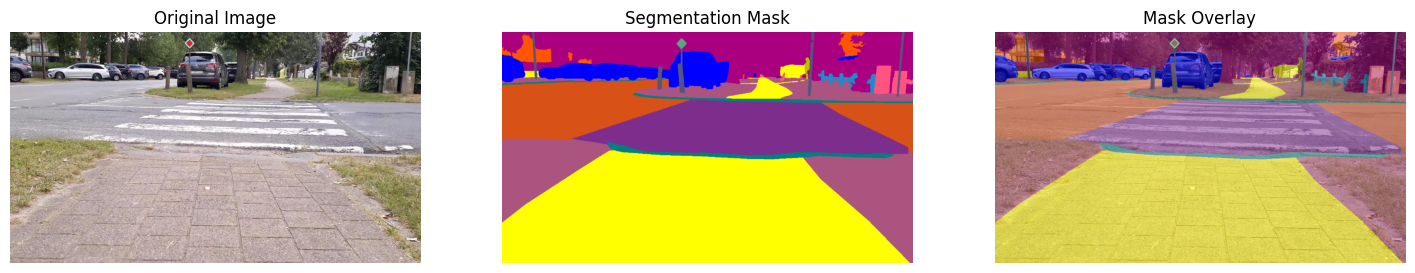

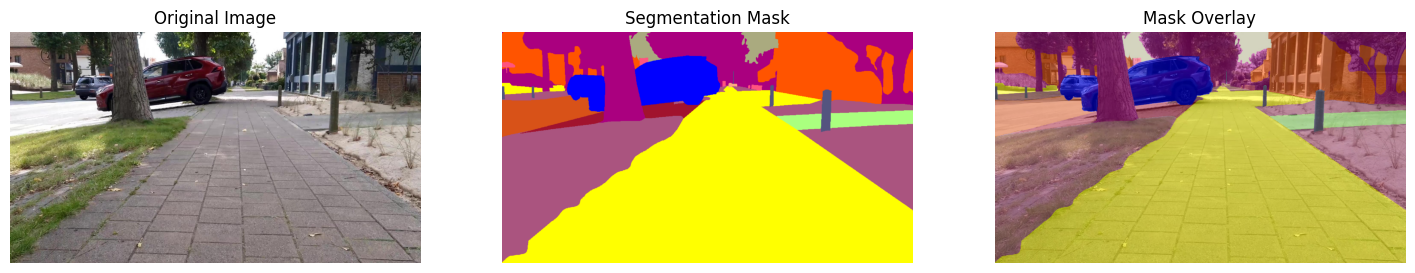

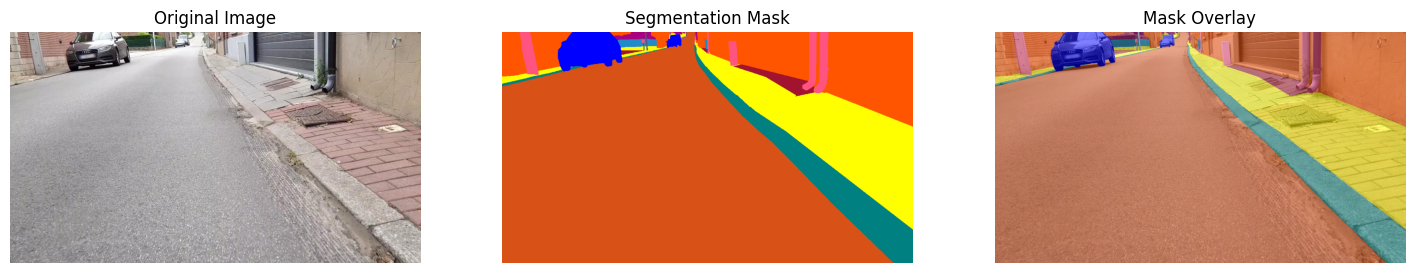

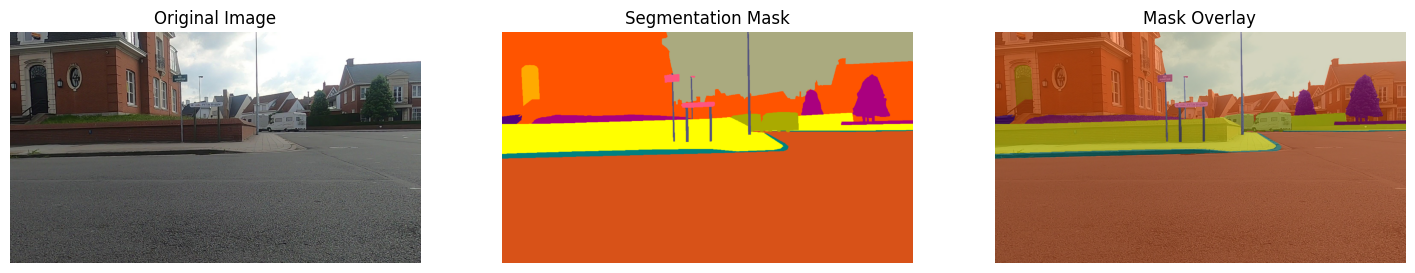

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches

# Create and show the legend separately
fig, ax = plt.subplots(figsize=(18, 2))

legend_patches = [patches.Patch(color=np.array(color)/255, label=label) for label, color in zip(id2label.values(), sidewalk_palette)]

ax.legend(handles=legend_patches, loc='center', bbox_to_anchor=(0.5, 0.5), ncol=5, fontsize=8)
ax.axis('off')

plt.show()

for i in range(5):
    image = train_ds[i]

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Show the original image
    ax[0].imshow(image['pixel_values'])
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    mask_np = np.array(image['label'])

    # Create a new empty RGB image
    colored_mask = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)

    # Assign colors to each value in the mask
    for label_id, color in enumerate(sidewalk_palette):
        colored_mask[mask_np == label_id] = color

    colored_mask_img = Image.fromarray(colored_mask, 'RGB')

    # Show the segmentation mask
    ax[1].imshow(colored_mask_img)
    ax[1].set_title('Segmentation Mask')
    ax[1].axis('off')

    # Convert the original image to RGBA to support transparency
    image_rgba = image['pixel_values'].convert("RGBA")
    colored_mask_rgba = colored_mask_img.convert("RGBA")

    # Adjust transparency of the mask
    alpha = 128  # Transparency level (0 fully transparent, 255 fully opaque)
    image_2_with_alpha = Image.new("RGBA", colored_mask_rgba.size)
    for x in range(colored_mask_rgba.width):
        for y in range(colored_mask_rgba.height):
            r, g, b, a = colored_mask_rgba.getpixel((x, y))
            image_2_with_alpha.putpixel((x, y), (r, g, b, alpha))

    superposed = Image.alpha_composite(image_rgba, image_2_with_alpha)

    # Show the mask overlay
    ax[2].imshow(superposed)
    ax[2].set_title('Mask Overlay')
    ax[2].axis('off')

    plt.show()


# Visualize class ocurrences

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = np.zeros(len(id2label))

for example in train_ds:
    mask_np = np.array(example['label'])
    unique, counts = np.unique(mask_np, return_counts=True)
    for u, c in zip(unique, counts):
        class_counts[u] += c

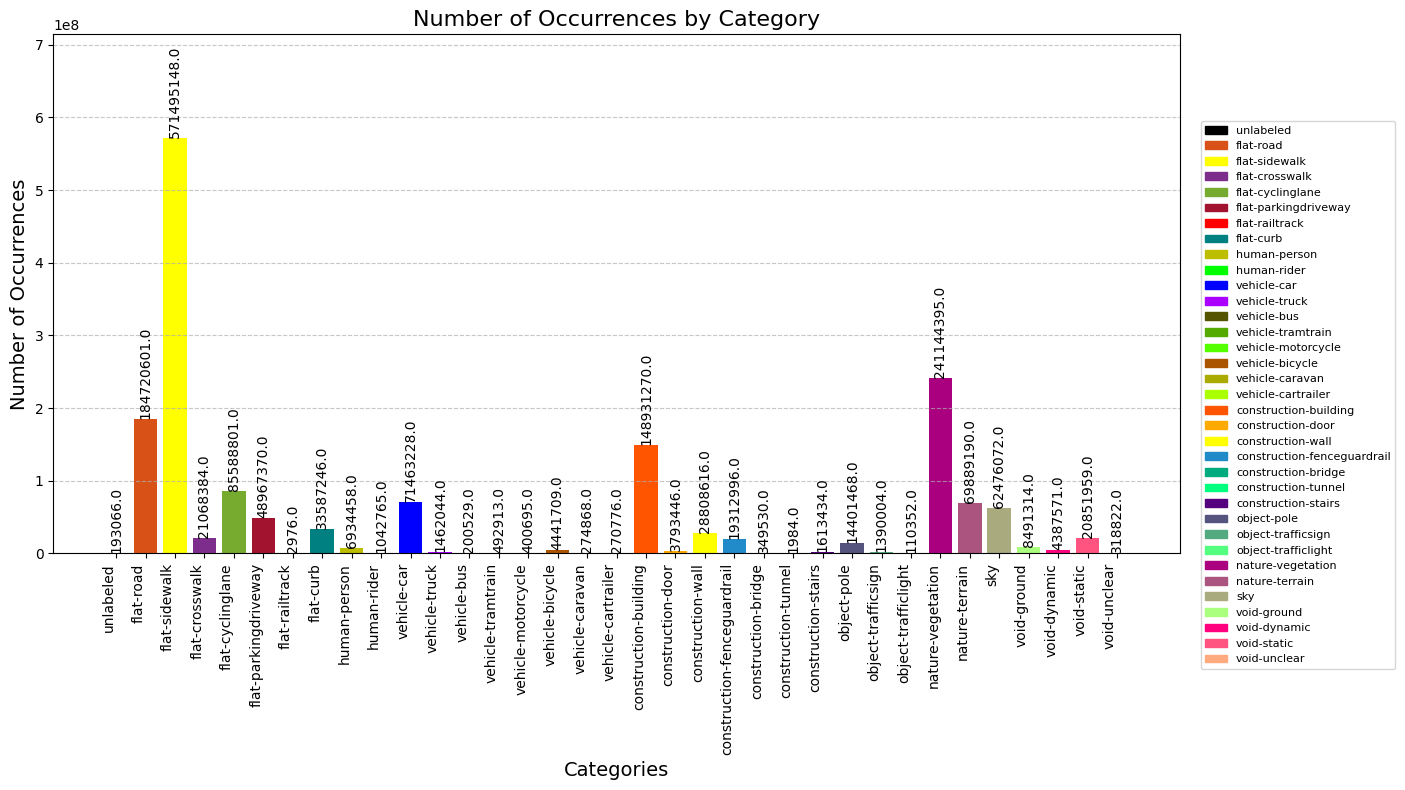

In [13]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import patches

labels = list(id2label.values())

# Normalize colors to be in the range [0, 1]
normalized_palette = [tuple(c / 255 for c in color) for color in sidewalk_palette]

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(range(len(labels)), class_counts, color=[normalized_palette[i] for i in range(len(labels))])

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90, ha="right")

ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Number of Occurrences", fontsize=14)
ax.set_title("Number of Occurrences by Category", fontsize=16)

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust the y-axis limit
y_max = max(class_counts)
ax.set_ylim(0, y_max * 1.25)

for bar in bars:
    height = bar.get_height()
    offset = 10  # Adjust this value as needed
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + offset, f"{height}",
            ha="center", va="bottom", rotation=90, fontsize=10, color='black')

fig.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=8)  # Adjust ncol as needed

plt.tight_layout()
plt.show()


# Add data augmentation and init image processor

In [27]:
import albumentations as A
from transformers import SegformerImageProcessor

image_processor = SegformerImageProcessor()

albumentations_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.7),
    A.RandomResizedCrop(height=512, width=512, scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=25, val_shift_limit=20, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.GaussNoise(var_limit=(10, 50), p=0.4),
])

def train_transforms(example_batch):
    augmented_images = [albumentations_transform(image=np.array(x))['image'] for x in example_batch['pixel_values']]
    labels = [x for x in example_batch['label']]
    inputs = image_processor(augmented_images, labels)
    return inputs

def val_transforms(example_batch):
    images = [x for x in example_batch['pixel_values']]
    labels = [x for x in example_batch['label']]
    inputs = image_processor(images, labels)
    return inputs


# Set transforms
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

# Init model from checkpoint

In [15]:
from transformers import SegformerForSemanticSegmentation

#pretrained_model_name = "nvidia/mit-b0"
pretrained_model_name = "sergiopaniego/segformer-b0-segments-sidewalk-finetuned"
model = SegformerForSemanticSegmentation.from_pretrained(
    pretrained_model_name,
    id2label=id2label,
    label2id=label2id
)

config.json:   0%|          | 0.00/2.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/14.9M [00:00<?, ?B/s]

 # Set training arguments and connect to Weights & biases

In [16]:
from transformers import TrainingArguments

output_dir = "segformer-b0-segments-sidewalk-finetuned"

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    save_total_limit=2,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    load_best_model_at_end=True,
    push_to_hub=True,
    report_to="wandb"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [17]:
import wandb

wandb.init(
    project="segformer-b0-segments-sidewalk-finetuned",  # change this
    name="segformer-b0-segments-sidewalk-finetuned",  # change this
    config=training_args,
)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Set custom compute_metrics for better logging

In [18]:
import evaluate
evaluate.logging.set_verbosity_error()

In [19]:
import torch
from torch import nn
import evaluate
import multiprocessing

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
  with torch.no_grad():
    logits, labels = eval_pred
    logits_tensor = torch.from_numpy(logits)
    # scale the logits to the size of the label
    logits_tensor = nn.functional.interpolate(
        logits_tensor,
        size=labels.shape[-2:],
        mode="bilinear",
        align_corners=False,
    ).argmax(dim=1)

    # currently using _compute instead of compute
    # see this issue for more info: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
    pred_labels = logits_tensor.detach().cpu().numpy()
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        metrics = metric._compute(
                predictions=pred_labels,
                references=labels,
                num_labels=len(id2label),
                ignore_index=0,
                reduce_labels=image_processor.do_reduce_labels,
            )

    # RuntimeWarning: invalid value encountered in divide iou = total_area_intersect / total_area_union

    # add per category metrics as individual key-value pairs
    per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
    per_category_iou = metrics.pop("per_category_iou").tolist()

    metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
    metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})

    return metrics

In [28]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=image_processor, # https://github.com/huggingface/transformers/issues/29790
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

## Test how the model behaves

In [30]:
import requests
from transformers import pipeline
import numpy as np
from PIL import Image, ImageDraw

url = "https://images.unsplash.com/photo-1594098742644-314fedf61fb6?q=80&w=2672&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

image = Image.open(requests.get(url, stream=True).raw)

image_segmentator = pipeline(
    "image-segmentation", model="sergiopaniego/segformer-b0-segments-sidewalk-finetuned"  # Change with your model name
)


results = image_segmentator(image)
print(results)

model.safetensors:   0%|          | 0.00/14.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': None, 'label': 'flat-road', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045E110>}, {'score': None, 'label': 'flat-sidewalk', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045DB70>}, {'score': None, 'label': 'flat-cyclinglane', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045E320>}, {'score': None, 'label': 'flat-parkingdriveway', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045E470>}, {'score': None, 'label': 'construction-building', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045E140>}, {'score': None, 'label': 'nature-vegetation', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045DC00>}, {'score': None, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=2672x4000 at 0x7A551045E7A0>}]


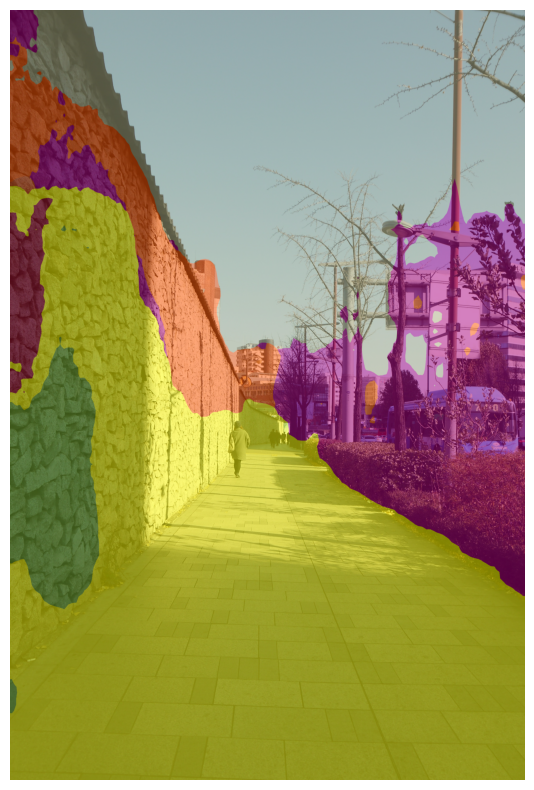

In [31]:
image_array = np.array(image)

segmentation_map = np.zeros_like(image_array)

for result in results:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

# Evaluate against test set

In [43]:
metrics = trainer.evaluate(test_ds)
print(metrics)

{'eval_loss': 0.48100510239601135, 'eval_mean_iou': 0.30386989714424123, 'eval_mean_accuracy': 0.346461235506646, 'eval_overall_accuracy': 0.8726176781473343, 'eval_accuracy_unlabeled': nan, 'eval_accuracy_flat-road': 0.9036043219808869, 'eval_accuracy_flat-sidewalk': 0.9690499181661223, 'eval_accuracy_flat-crosswalk': 0.46992188421872416, 'eval_accuracy_flat-cyclinglane': 0.9276551364205083, 'eval_accuracy_flat-parkingdriveway': 0.5350995980879178, 'eval_accuracy_flat-railtrack': nan, 'eval_accuracy_flat-curb': 0.5138739506269946, 'eval_accuracy_human-person': 0.4790602236585616, 'eval_accuracy_human-rider': 0.0, 'eval_accuracy_vehicle-car': 0.9339036241461045, 'eval_accuracy_vehicle-truck': 0.0, 'eval_accuracy_vehicle-bus': 0.0, 'eval_accuracy_vehicle-tramtrain': nan, 'eval_accuracy_vehicle-motorcycle': 0.0, 'eval_accuracy_vehicle-bicycle': 0.0947508120001397, 'eval_accuracy_vehicle-caravan': 0.0, 'eval_accuracy_vehicle-cartrailer': 0.0, 'eval_accuracy_construction-building': 0.94691

# Access it using the inference API and visualize results (TODO)

You must set the model task so it can be used by creating the model card

[IMAGE]

https://huggingface.co/spaces/sergiopaniego/segformer-b0-segments-sidewalk-finetuned


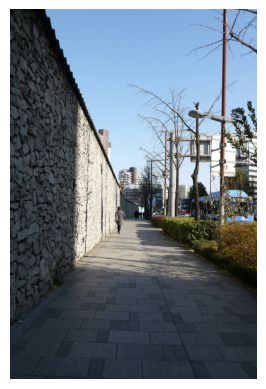

In [35]:
url = "https://images.unsplash.com/photo-1594098742644-314fedf61fb6?q=80&w=2672&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
image = Image.open(requests.get(url, stream=True).raw)

plt.imshow(image)
plt.axis('off')
plt.show()

In [26]:
from huggingface_hub import InferenceClient

client = InferenceClient()

response = client.image_segmentation(
    model="sergiopaniego/segformer-b0-segments-sidewalk-finetuned",
    image='https://images.unsplash.com/photo-1594098742644-314fedf61fb6?q=80&w=2672&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
)

print(response)

[ImageSegmentationOutputElement(label='flat-sidewalk', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9BC83F8B0>, score=1.0), ImageSegmentationOutputElement(label='flat-crosswalk', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9DA405360>, score=1.0), ImageSegmentationOutputElement(label='flat-cyclinglane', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9DA4053F0>, score=1.0), ImageSegmentationOutputElement(label='flat-parkingdriveway', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9DA404DF0>, score=1.0), ImageSegmentationOutputElement(label='vehicle-car', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9DA405210>, score=1.0), ImageSegmentationOutputElement(label='construction-building', mask=<PIL.PngImagePlugin.PngImageFile image mode=L size=2672x4000 at 0x7CD9DA4056C0>, score=1.0), ImageSegmentationOutputElement(label='construction-wall', mask=<PIL.Pn

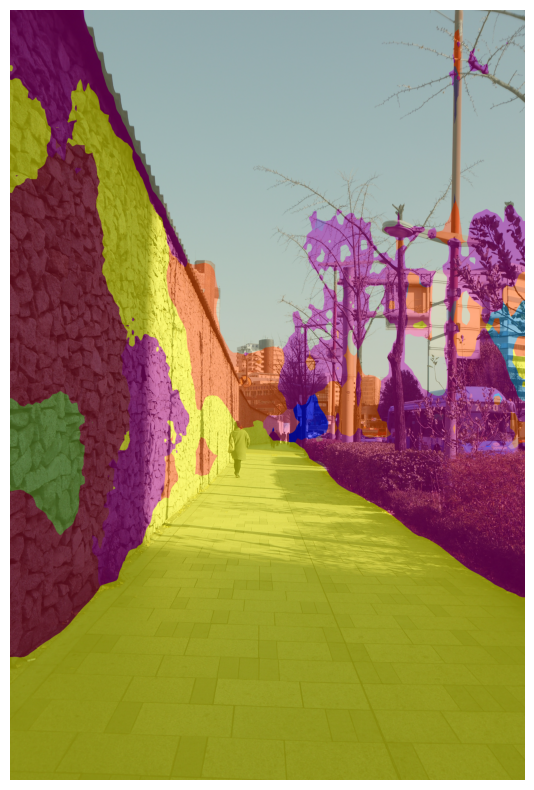

In [33]:
image_array = np.array(image)
segmentation_map = np.zeros_like(image_array)

for result in response:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

https://huggingface.co/tasks/image-segmentation


```
import { HfInference } from "@huggingface/inference";

const inference = new HfInference(HF_TOKEN);
await inference.imageSegmentation({
    data: await (await fetch("https://picsum.photos/300/300")).blob(),
    model: "sergiopaniego/segformer-b0-segments-sidewalk-finetuned",
});

```

